In [1]:
import pandas as pd
import numpy as np

In [2]:
def ctrate_test_customers(n_customers: int, n_first_id=0) -> pd.DataFrame:
    df = pd.DataFrame(index=pd.Index(range(n_first_id, n_customers), name='customer_id'),
                      )
    return df

#  Красиво, но медленно 10**6 -> 10**7 - 14s
# def index_to_group_id(customer_id: pd.Series) -> pd.Series:
#     return customer_id.to_series().apply(lambda x: sum(map(int, str(x))))

# Быстро  10**6 -> 10**7 - 1.76s
def index_to_group_id(customer_id: pd.Series) -> pd.Series:
    group_id = np.zeros(customer_id.size, dtype=int)

    for discharge in range(len(str(customer_id.max())), 0, -1):
        group_id += customer_id % (10**discharge) // 10**(discharge-1)
    return group_id


def hypothesis_testing(n_customers: int, n_first_id=0) -> pd.Series:
    df = ctrate_test_customers(n_customers, n_first_id)
    df['group_id'] = index_to_group_id(df.index)
    return df.group_id.value_counts().rename('customers').rename_axis('group_id')


def plot_customers_in_group(customers_in_group: pd.Series):
    customers_in_group.sort_index().plot.barh()

CPU times: user 593 ms, sys: 55.4 ms, total: 648 ms
Wall time: 560 ms


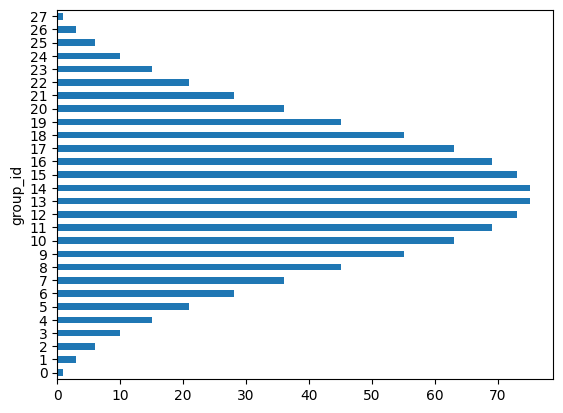

In [3]:
%%time

customers_in_group = hypothesis_testing(1000)
# customers_in_group
plot_customers_in_group(customers_in_group)

In [4]:
%%time

customers_in_group = hypothesis_testing(100000)
# customers_in_group
plot_customers_in_group(customers_in_group)

CPU times: user 230 ms, sys: 93.6 ms, total: 324 ms
Wall time: 169 ms


In [5]:
%%time

customers_in_group = hypothesis_testing(90238, 1000)
# customers_in_group
plot_customers_in_group(customers_in_group)

CPU times: user 226 ms, sys: 75.6 ms, total: 301 ms
Wall time: 162 ms


CPU times: user 1.69 s, sys: 359 ms, total: 2.05 s
Wall time: 1.86 s


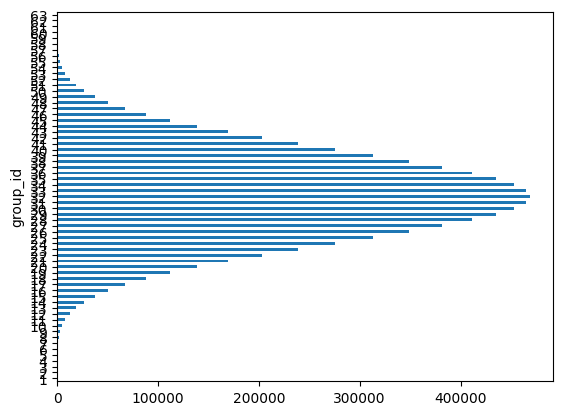

In [6]:
%%time

customers_in_group = hypothesis_testing(10**7, 10**6)
# customers_in_group
plot_customers_in_group(customers_in_group)

Разбиение является нормальным что ведет к сильному разбросу количеству пользователей в группах,
что не является проблемой если это учитывать при выборе групп для конкретного тестирования на основании желаемого
доверительного интервала. Также количество групп может быть не чётным и самая большая группа будет без зеркальной пары.

In [7]:
df = ctrate_test_customers(10000)
df['group_id'] = index_to_group_id(df.index)
df.head()

group_id
customer_id          
0                   0
1                   1
2                   2
3                   3
4                   4

Если предположить что каждый новый пользователь получает id+1, то складывается проблема того что пользователи
которые зарегистрировались раньше будут попадать в группы с меньшим id в более что может оказаться не объективным.

In [8]:
df.reset_index().groupby('group_id').customer_id.mean().rename(('customer_id_mean'))

group_id
0        0.00
1      277.75
2      555.50
3      833.25
4     1111.00
5     1388.75
6     1666.50
7     1944.25
8     2222.00
9     2499.75
10    2777.50
11    3055.25
12    3333.00
13    3610.75
14    3888.50
15    4166.25
16    4444.00
17    4721.75
18    4999.50
19    5277.25
20    5555.00
21    5832.75
22    6110.50
23    6388.25
24    6666.00
25    6943.75
26    7221.50
27    7499.25
28    7777.00
29    8054.75
30    8332.50
31    8610.25
32    8888.00
33    9165.75
34    9443.50
35    9721.25
36    9999.00
Name: customer_id_mean, dtype: float64